In [186]:
import torch
import numpy as np
import matplotlib.pyplot as plt
print("CUDA是否可用:", torch.cuda.is_available()) 
print("PyTorch使用的CUDA版本:", torch.version.cuda) 

CUDA是否可用: True
PyTorch使用的CUDA版本: 11.8


In [187]:
x_data = torch.tensor([[1.0],[2.0],[3.0]])
y_data = torch.tensor([[3.0],[5.0],[7.0]])


In [ ]:
# 建立网络模型
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1,bias=True)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
model = LinearModel()

轮数:1 Loss:18.8927
轮数:2 Loss:14.9639
轮数:3 Loss:11.8583
轮数:4 Loss:9.4033
轮数:5 Loss:7.4627
轮数:6 Loss:5.9285
轮数:7 Loss:4.7157
轮数:8 Loss:3.7569
轮数:9 Loss:2.9989
轮数:10 Loss:2.3996
轮数:11 Loss:1.9258
轮数:12 Loss:1.5511
轮数:13 Loss:1.2547
轮数:14 Loss:1.0204
轮数:15 Loss:0.8350
轮数:16 Loss:0.6883
轮数:17 Loss:0.5722
轮数:18 Loss:0.4803
轮数:19 Loss:0.4076
轮数:20 Loss:0.3499
轮数:21 Loss:0.3042
轮数:22 Loss:0.2680
轮数:23 Loss:0.2392
轮数:24 Loss:0.2163
轮数:25 Loss:0.1981
轮数:26 Loss:0.1835
轮数:27 Loss:0.1719
轮数:28 Loss:0.1626
轮数:29 Loss:0.1551
轮数:30 Loss:0.1490
轮数:31 Loss:0.1441
轮数:32 Loss:0.1401
轮数:33 Loss:0.1368
轮数:34 Loss:0.1341
轮数:35 Loss:0.1318
轮数:36 Loss:0.1299
轮数:37 Loss:0.1283
轮数:38 Loss:0.1268
轮数:39 Loss:0.1256
轮数:40 Loss:0.1245
轮数:41 Loss:0.1235
轮数:42 Loss:0.1226
轮数:43 Loss:0.1217
轮数:44 Loss:0.1210
轮数:45 Loss:0.1202
轮数:46 Loss:0.1195
轮数:47 Loss:0.1188
轮数:48 Loss:0.1182
轮数:49 Loss:0.1176
轮数:50 Loss:0.1170
轮数:51 Loss:0.1164
轮数:52 Loss:0.1158
轮数:53 Loss:0.1152
轮数:54 Loss:0.1146
轮数:55 Loss:0.1141
轮数:56 Loss:0.113

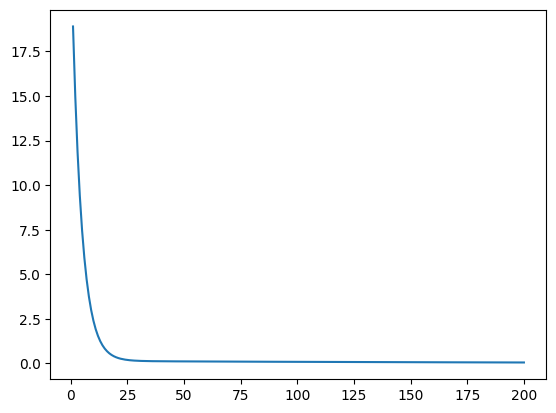

In [189]:
# 定义损失和优化器
criterion = torch.nn.MSELoss(True,None)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 训练过程
n = 200
list = []
for epoch in range(n):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    list.append(loss.detach().numpy())
    print(f"轮数:{epoch+1} Loss:{loss:.4f}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f"最终w={model.linear.weight.item()} b={model.linear.bias.item()}")
epoch = np.arange(1,n+1)
plt.plot(epoch,list)

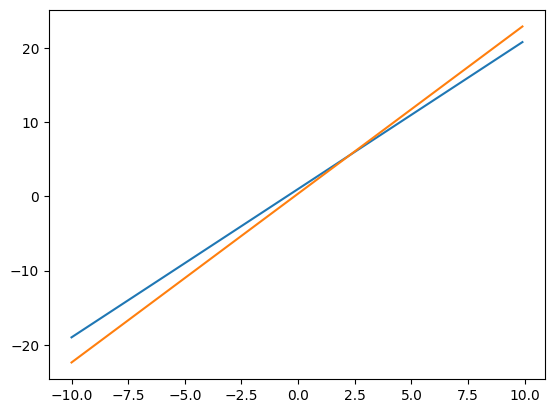

In [190]:
def fun(x):
    return 2 * x + 1
x = np.arange(-10,10,0.1)
y_ture = np.array([fun(xx) for xx in x])
x = np.arange(-10, 10, 0.1, dtype=np.float32)  # 定义为float32
x_tensor = torch.from_numpy(x[:, np.newaxis])  # 张量类型会是 torch.float32
y_pred = model(x_tensor)

plt.figure()
plt.plot(x,y_ture)
plt.plot(x_tensor.detach().numpy(),y_pred.detach().numpy())
plt.show()